# Data-driven business -- ProRail Hersteltijd 

**********************************************************************************************************
**********************************************************************************************************

![1200px-ProRaillogo](1200px-ProRail_logo.png) 
![hu-logo-en](hu-logo-en.png)

***********************************************************************************************************
***********************************************************************************************************

## <span style='font-family:font_family name'> Groep : V2A-PG3 </span>
## <span style='font-family:font_family name'> Emiel Verhoef , Studentnummer : 1760229  </span>
## <span style='font-family:font_family name'> Stan Haakman , Studentnummer : 1781254 </span>
## <span style='font-family:font_family name'> Khai-Tam Nguyen , Studentnummer : 1789287 </span>
## <span style='font-family:font_family name'> Hussin Almoustafa , Studentnummer : 1776495 </span>




# Business Understanding

## Doel 
De doelstelling van het project is om de planners een inschatting te geven over de duur van de storing zodat zei vervolgens de hervatting van het treinverkeer kunnen organiseren. Uit de huidige situatie blijkt dat de voorspellingen van de monteurs vaak te pessimistisch zijn en daardoor zijn storingen vaak eerder opgelost dan voorspelt.

De vraag van ProRail en de planners van de NS is:
Kunnen we op basis van de data een 'betere' voorspelling maken van de functiehersteltijd waardoor we het hervatten van de dienstregeling soepeler kunnen laten verlopen.
![1](1.png)


**tekortkomingen huidige situatie**

In de huidige situatie bij Pro-rail is gebleken dat de prognose van de monteur pessimistisch is. Dit beteken dat de monteur te veel hersteltijd inschat en het treinverkeer al eerder hervat had kunnen worden.

**toekomstige situatie**

Ons doel is om op basis van de aangeleverde data een betere voorspelling te doen dan de huidige prognose van Pro-Rail. Dit doen we zodat de planning mogelijk sneller het treinverkeer weer in kan gaan plannen en daardoor is de vertraging eerder opgelost. 


# Stakeholders + classificatie (primair/ secundair):

- **1** Prorail meldkamer (Primair)
- **2** Ns  (Secundair)
- **3** Riesgers  (Secundair)
- **4** Planners   (Primair)
- **5** Machinisten  (Secundair)
- **6** Aannemersbedrijf  (Secundair) 


# Stakeholders analyse (Mendelow’s matrix)

|*Belang*|laag|matig|hoog|zeer hoog|
|---|---|---|---|---|
|**Invloed**|||||
|laag| **(6)**  |   |   |   |
|matig|   |**(5)**   | **(3)**  |   |
|hoog|   | **(2)**  | **(4)**  |  |
|zeer hoog|   |   |   | **(1)**  |




## Data understanding 
In de fase Data Understanding zullen we kijken naar de inhoud van de data die beschikbaar is. Deze stap is van cruciaal belang om onverwachte problemen te voorkomen tijdens de volgende fase - Data preparation - die doorgaans het langste deel van een project is.

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats

In [14]:
#ProRail cvs Data file 
df = pd.read_csv('sap_storing_data_hu_project.csv')
df['#stm_sap_meldnr'].sort_index(inplace = True)

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,11,19,21,24,25,27,32,33,36,37,38,39,40,46,47,48,49,51,53,55,56,60,73,75,78,80,82,83,86,87,91,95,99,102,103,104,107,108,109,110,111,112,113,116,118,119,120,121,122,123,124,129) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [15]:
pd.set_option('display.max_rows', df.shape[0]+1) #max aantal rows 

In [16]:
# We kunnen hier zien dat er veel duplicates zijn. Dit kan een groot effect hebben op onze modellen.
# Daarom halen we de duplicates weg.
len(df['#stm_sap_meldnr'])-len(df['#stm_sap_meldnr'].drop_duplicates())

332045

In [22]:
# We kunnen hier zien dat er heel veel nans zijn in onze data.
df.isna().sum()

Unnamed: 0                              0
#stm_sap_meldnr                         0
stm_mon_nr                              1
stm_vl_post                        384808
stm_sap_meld_ddt                        1
stm_sap_mon_meld_ddt                   17
stm_sap_meldtekst_lang                 38
stm_mon_begin_ddt                  384891
stm_sap_meldtekst                     199
stm_mon_toelichting_trdl           387719
stm_oh_pg_mld                      148845
stm_geo_mld                          6910
stm_geo_mld_uit_functiepl            6925
stm_equipm_nr_mld                  155344
stm_equipm_soort_mld               155347
stm_equipm_omschr_mld              155349
stm_km_van_mld                          4
stm_km_tot_mld                          4
stm_prioriteit                        112
stm_scenario_mon                   546201
stm_status_melding_sap                  4
stm_mon_nr_status_omschr           406981
stm_mon_nr__statuscode             373418
stm_mon_nr_status_wijzdd          

In [25]:
# Als we alle rijen met nans weg halen, dan hebben we geen rijen meer. Daarom zullen we voor elk specifiek model nans 
# weg moeten halen.
df.dropna().shape[0]

0

In [36]:
# Hier kunnen we ook zien dat er een paar nan values zitten in onze target variabel. 
# Hoogst waarschijnlijk zullen we deze moeten verwijderen.
df['stm_fh_duur'].isna().sum()

11

In [37]:
# Onze target variabel is een float, dus voor classificatie algoritmes zullen we het 
df['stm_fh_duur'].dtypes

dtype('float64')

In [39]:
df['stm_fh_duur'].describe()

count    566470.000000
mean       1036.440175
std        6882.954734
min           0.000000
25%          15.000000
50%          87.000000
75%         269.000000
max      528297.000000
Name: stm_fh_duur, dtype: float64

In [43]:
# We kunnen hier zien dat de correlatie tussen onze target variabel en de data erg laag is.
# Waarschijnlijk kunnen we dan niet een linear regressie model gebruiken.
df.corr()['stm_fh_duur'].sort_values(ascending=False)

stm_fh_duur                  1.000000
stm_arbeid                   0.075530
#stm_sap_meldnr              0.064727
stm_km_tot_gst               0.029332
stm_oorz_code                0.028145
stm_progfh_gw_teller         0.023536
stm_geo_mld_uit_functiepl    0.023329
stm_km_van_mld               0.020317
stm_km_tot_mld               0.020279
stm_geo_gst_uit_functiepl    0.020086
stm_progfh_gw_lwd_datum      0.018787
stm_km_van_gst               0.017928
stm_contractgeb_gst          0.016218
stm_equipm_nr_mld            0.013950
stm_equipm_nr_gst            0.012819
stm_x_run_id                 0.007974
stm_contractgeb_mld          0.007300
stm_rapportage_jaar          0.005860
stm_reactie_duur             0.004180
stm_mon_nr__statuscode       0.001963
stm_prioriteit              -0.000257
stm_schadenr                -0.000558
stm_x_actueel_ind           -0.000580
stm_rapportage_maand        -0.006801
stm_fh_status               -0.007699
stm_x_bk                    -0.010324
stm_status_s

# Conclusies

We hebben gezien dat er te veel duplicates zijn. Deze zullen we hoogst waarschijnlijk moeten verwijderen. 
Verder hebben we ook veel nans gezien. Het probleem hiermee is elke rij een nan heeft. We kunnen dus niet zo maar alle rijen met nans weghalen.  

Onze target variabele is een float, dus voor classificatie algoritmes zullen we het categorial moeten maken.  
Verder zien we ook dat het gemiddelde van onze target variabele meer dan 1000 minuten is en dat onze grootste hersteltijd 530000 minuten is. Dit betekent dat er outliers zijn die een heel groot effect hebben op onze dataset.  

Verder zien we ook dat de huidige correlatie van onze target variabel erg laag is met de rest van de data. Waarschijnlijk is een linear regressie model niet mogelijk. We zullen waarschijnlijk moeten kijken naar een van de classificatie algoritmes.  

## Data preparation 
Data preparation is het opschonen, structureren en verrijken van ruwe data tot een gewenste output voor analyse. Het wordt gewoonlijk 'conciërgewerk' genoemd, maar het is enorm belangrijk en cruciaal voor de missie om robuuste, nauwkeurige downstream-analyses te garanderen. Als datavoorbereiding op de juiste manier wordt uitgevoerd, krijgt u inzicht in de aard van uw gegevens, zodat u er betere vragen over kunt stellen.


In [34]:
# Hier halen we alle duplicates weg in de kolom #stm_sap_meldnr
df.drop_duplicates(subset = '#stm_sap_meldnr', keep = 'last',inplace = True)
len(df['#stm_sap_meldnr'])-len(df['#stm_sap_meldnr'].drop_duplicates())

0

In [8]:
# Functie om outliers te verwijderen 
def column_outlier(strength, dataframe, columns):
    temp_dataframe = dataframe.copy()
    try:
        if strength == 's':
            strength=3
        elif strength == 'a':
            strength=1.5
    except:
        print("Invalid strength")
    for column in columns:
        Q1 = temp_dataframe[column].quantile(0.25)
        Q3 = temp_dataframe[column].quantile(0.75)
        IQR = Q3 - Q1
        temp_dataframe = temp_dataframe[~((temp_dataframe[column] < (Q1 - strength * IQR)) |(temp_dataframe[column] > (Q3 + strength* IQR)))]
    return temp_dataframe

In [ ]:
def get_accuracy(r,zip_list):
    return len([ _ for x in zip_list if x[0]+r >= x[1] >= x[0]-r])/len(zip_list)

In [9]:
# Functie om dummies te creëren voor een kolom
def create_dummies(target_df, source_df, column):
    return target_df.join(pd.get_dummies(source_df.iloc[target_df.index][column]))

We gaan Natuurlijk de herstel tijd voorspelen. dus laten we de kolom [stm_fh_duur] opschonen en daarna plotten.

In [ ]:
# We willen alleen durations die niet gelijk zijn aan 0 en kleiner zijn dan 8 uur
df = df[(df.stm_fh_duur != 0) & (df.stm_fh_duur <= 480)]

In [ ]:
import seaborn as sns 

In [ ]:
sns.kdeplot(df.stm_fh_duur)

In [15]:
# Ik zorg er hier voor dat de 'stm_progfh_in_duur' kolom naar floats gecast wordt
df.stm_progfh_in_duur = df.stm_progfh_in_duur.apply(lambda x: float(str(x).replace('-','').replace('*','').strip()))
df.stm_progfh_in_duur.dtypes

dtype('float64')

De kolom [stm_sap_melddatum] bevat de datum van de melding , Hier gaan we de datum naar sezoenen en week nummer converteren.

In [16]:
# voeg dummy kolommen voor seizoenen toe
df.stm_sap_melddatum = pd.to_datetime(df.stm_sap_melddatum)

df['date_offset'] = (df.stm_sap_melddatum.dt.month*100 + df.stm_sap_melddatum.dt.day - 320)%1300

df['seizoen_melding'] = pd.cut(df.copy()['date_offset'], [0, 300, 602, 900, 1300], 
                      labels=['spring', 'summer', 'autumn', 'winter'])

df.drop(['date_offset'], axis=1)
df = df.join(pd.get_dummies(df.seizoen_melding))
df['seizoen_melding'].value_counts()

summer    93837
spring    92732
winter    89686
autumn    88033
Name: seizoen_melding, dtype: int64

In [17]:
# maak een kolom voor weeknummers van de melding
df['weeknr']= df.stm_sap_melddatum.dt.isocalendar().week.apply(lambda x: 'w' + str(x))

Nu kunnen we de vertaling van kolommen [stm_techn_mld],[stm_contractgeb_gst],[stm_geo_mld],[stm_oorz_code] toevoegen door een externe data's set's

In [18]:
# join de oorzaakcodes
o_df = pd.read_csv('Oorzaakcodes.csv', sep = ';')
o_df = o_df.rename(columns={'Code': 'stm_oorz_code'})
df = df.merge(o_df, on = 'stm_oorz_code', how = 'outer')


In [19]:
# outlier verwijderen en de mean van fh_duur berekenen voor eelke oorzaak 
mean_oorzaak_df = column_outlier('a', df.copy(), ['stm_fh_duur'])[['stm_fh_duur', 'Oorzaak']].groupby('Oorzaak', as_index = False).mean()
mean_oorzaak_df

,Oorzaak,stm_fh_duur
0,Aanrijding (bijna) tijdens werkzaamheden,83.625954
1,Aanrijding met personen langs de baan,NaN
2,Aanrijding met wegverkeer,NaN
3,Afstelling onjuist/verlopen,119.921819
4,Applicatie/softwarefout,48.132208
5,Belemmerende vegetatie,124.150862
6,Bij onderzoek in orde/geen oorzaak gevonden,94.706647
7,Bijna aanrijding met persoon langs baan,45.555757
8,Bijna aanrijding met wegverkeer,72.355301
9,Braamvorming,100.297101


C:\Users\hasso\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


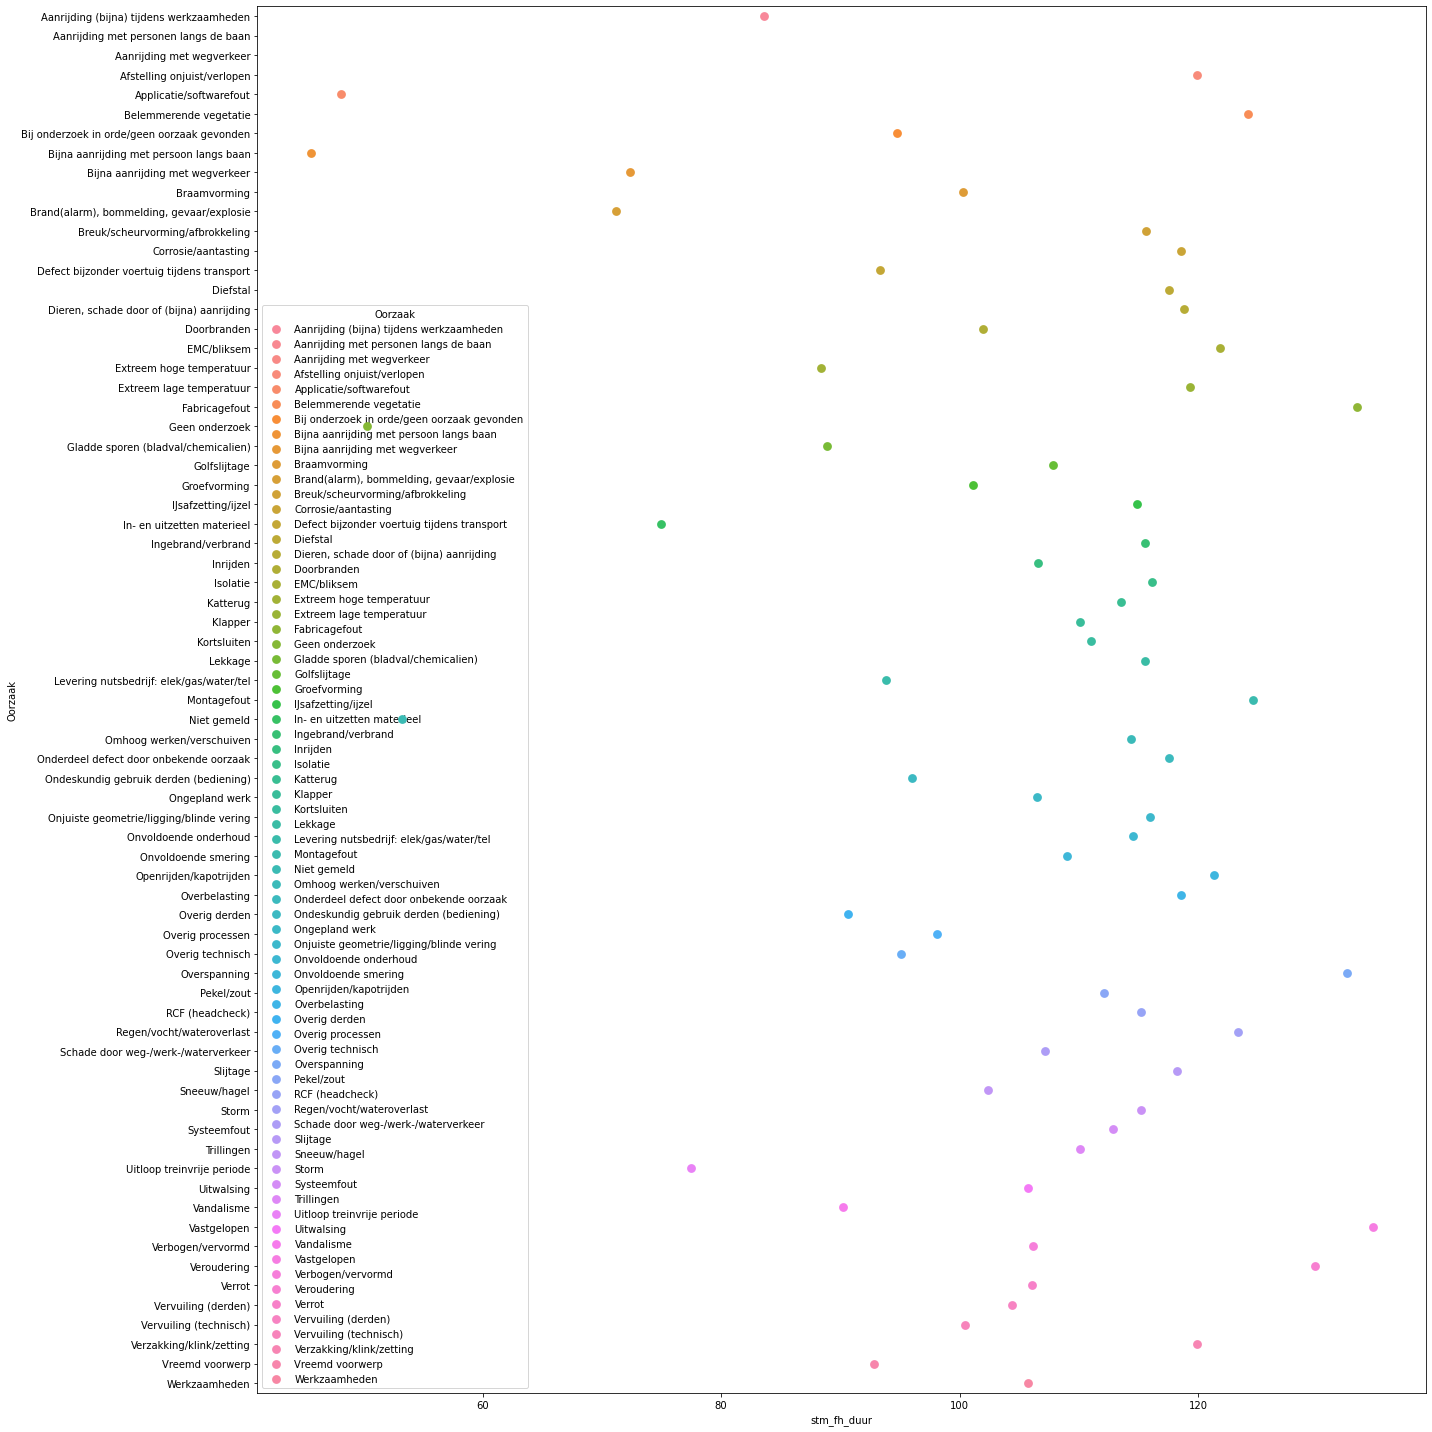

In [20]:
x = 'Oorzaak'
y = 'stm_fh_duur'
plt.figure(figsize=(20,20))
new_data= mean_oorzaak_df.sort_values(by ='stm_fh_duur' , ascending=False)
new_data_sort=mean_oorzaak_df
ax=sns.pointplot(new_data_sort['stm_fh_duur'], new_data_sort['Oorzaak'], hue=new_data_sort['Oorzaak'])
plt.tight_layout()
plt.show()

In [21]:
# join de goetrajectcodes
geo_df = pd.read_csv('geocodes.csv',sep = ';') 
geo_df = geo_df.rename(columns={'Code': 'stm_geo_mld'}) 
df = df.merge(geo_df, on = 'stm_geo_mld', how = 'outer') 


In [22]:
# outlier verwijderen en de mean van fh_duur berekenen voor eelke Traject  
mean_traject_df = column_outlier('a', df.copy(), ['stm_fh_duur'])[['stm_fh_duur', 'Traject']].groupby('Traject', as_index = False).mean()
mean_traject_df

,Traject,stm_fh_duur
0,Aachen (D) - Herzogenrath (D),NaN
1,Alkmaar,50.065217
2,Alkmaar - Uitgeest,102.285714
3,Almelo,74.444444
4,Almelo - Hengelo,29.000000
5,Almelo Dollegoor,NaN
6,Almelo Gem. Stamlijn,NaN
7,Alphen a/d Rijn,66.000000
8,Alphen a/d Rijn - Leiden Centraal,110.714286
9,Alphen a/d Rijn Industrieterrein Rijnhaven,NaN


In [23]:
# join de Contractgebiedcodes
cg = pd.read_excel('Contractgebiedcodes.xlsx') 
cg = cg.rename(columns={'Code': 'stm_contractgeb_gst'})
df = df.merge(cg, on = 'stm_contractgeb_gst', how = 'outer') 


<AxesSubplot:xlabel='stm_fh_duur', ylabel='Contractgebied'>

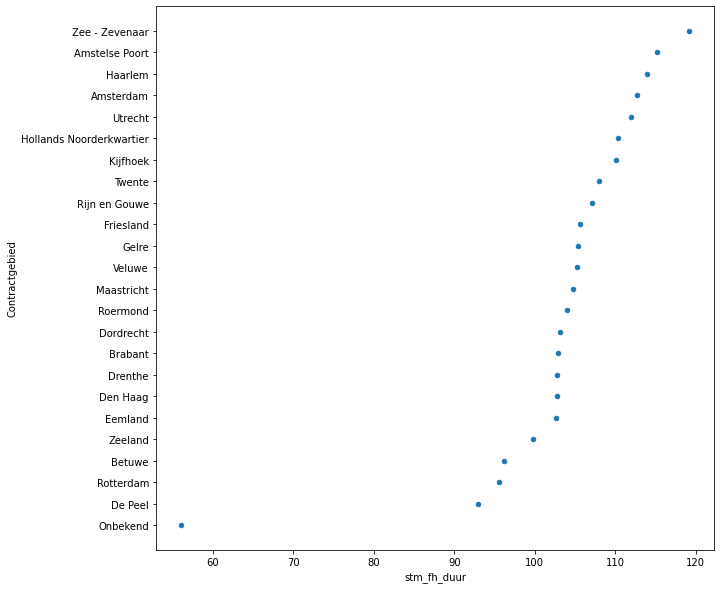

In [24]:
# outlier verwijderen en de mean van fh_duur berekenen voor eelke Contractgebied  
mean_Contractgebied_df = column_outlier('a', df.copy(), ['stm_fh_duur'])[['stm_fh_duur', 'Contractgebied']].groupby('Contractgebied', as_index = False).mean()

#Plot de data
x = 'stm_fh_duur'
y = 'Contractgebied'

tplot = mean_Contractgebied_df[['stm_fh_duur','Contractgebied']]
tplot.sort_values(['stm_fh_duur'], ascending=True, inplace=True)
tplot.dropna(inplace=True)

tplot.plot(x=x, y=y, kind='scatter',figsize=(10,10))

In [25]:
# join de techniekvelden
tgv_df = pd.read_csv('techniekvelden.csv', sep = ';')
tgv_df = tgv_df.rename(columns={'Letter': 'stm_techn_mld'})
df = df.merge(tgv_df, on = 'stm_techn_mld', how = 'outer') 

In [26]:
df[['stm_techn_mld','Techniekveld OH plangroep']].value_counts()

stm_techn_mld  Techniekveld OH plangroep
S              Seinwezen                    104352
B              Baan                          67838
P              Post 21                       38362
T              Telecom                       33485
E              Energievoorziening            22688
K              Kunstwerken                   15779
O              Operationeel beheer           10082
G              Gebouwen                       2718
M              MR                             1961
I              Ondergrondse infra              321
X              Onbekend                        252
A              ATM                              76
dtype: int64

We nemen ook kolom meldtijd mee ! 

In [27]:
# kolom voor meltijd h
df['meldtijd_h'] = df.stm_sap_meldtijd.str.split(':').str[0]

Om een accurate tijdstip te kunnen voorspelen maken we bins van 5 minuten die geven aan hoe lang zou de hersteltijd plaats vinden. 
De kolom [stm_reactie_duur] is de tijd die de aannemer heeft om ter plaats te zijn. Dat zou ons intresant vinden om ook te willen voorspellen.



In [ ]:
# maak target var bins zodat we classification kunnen gebruiken
error_margin  = 5
bins = [x for x in range(0,481,error_margin)]
labels = [x for x in range(1,len(bins))]
df['duration_bin'] = pd.cut(df['stm_fh_duur'], bins = bins, labels=labels)

In [ ]:
error_margin1  = 5
bins1 = [x for x in range(0,481,error_margin1)]
labels1 = [x for x in range(1,len(bins1))]
df['duration_bin_reactie'] = pd.cut(df['stm_reactie_duur'], bins = bins1, labels=labels1)


## Modeling 


In [30]:
def get_accuracy(r,zip_list):
    return len([ _ for x in zip_list if x[0]+r >= x[1] >= x[0]-r])/len(zip_list)

## MODEL COMPARISON 

* 1  Decision Tree   

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.model_selection import train_test_split
from datetime import datetime
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import r2_score
import pickle

In [32]:
# Onze data slice met de numriek kolomen 
dt_df = df.copy()[['duration_bin', 'stm_reactie_duur', 'stm_prioriteit','stm_km_van_mld', 'stm_km_tot_mld']].dropna()

In [33]:
# dummies maken  
dt_df = create_dummies(dt_df,df,['Traject','meldtijd_h','stm_equipm_soort_mld', 'weeknr', 'stm_techn_mld', 'Oorzaak'])

dt_df = dt_df.dropna()
    
df.stm_fh_status = df.stm_fh_status.apply(lambda x: f"status: {x}")
dt_df = create_dummies(dt_df,df,['stm_fh_status'])

Onze target variabel is : 

In [34]:
X = dt_df.drop(columns = ['duration_bin']) #feauters 
y = dt_df['duration_bin'] #Target 


Data splitsen naar trainen set and test set :


In [35]:
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X, y, test_size=0.2, random_state = 0)
clf = DecisionTreeClassifier(max_depth = 13, random_state = 0) #Hyperparameter : 13 
clf.fit(X_train_dt, y_train_dt)  

DecisionTreeClassifier(max_depth=13, random_state=0)

In [36]:
y_pred_dt = clf.predict(X_test_dt)
y1_ax = [get_accuracy(x, list(zip(list(y_test_dt), y_pred_dt))) for x in range(0,30)] 

In [37]:
#om onze model op te slaan !! 
# filename = 'Trained_ML_algorithms/decision_tree.sav'
# pickle.dump(clf, open(filename, 'wb'))


In [38]:
accuracy_score(y_test_dt,y_pred_dt) #model score

0.15624700157631416

* 2 KNN 

In [39]:
# svm, random forests en gaussion process classifier duren veels te lang op deze dataset

kn_df = df[['duration_bin','stm_equipm_nr_mld','stm_reactie_duur', 'stm_prioriteit', 'stm_km_tot_mld','spring', 'summer','autumn','winter']].dropna()

X = kn_df.drop(columns = ['duration_bin'])
y = kn_df.duration_bin


Data splitsen naar trainen set and test set :


In [40]:
X_train_kn, X_test_kn, y_train_kn, y_test_kn = train_test_split(X, y, test_size=0.2)

clf2 = KNeighborsClassifier(n_neighbors = 13).fit(X_train_kn, y_train_kn)


In [41]:
y_pred_kn = clf2.predict(X_test_kn)
y2_ax = [get_accuracy(x, list(zip(list(y_test_kn), y_pred_kn))) for x in range(0,30)]

In [42]:
accuracy_score(y_test_kn,y_pred_kn) #model score

0.08105424373495801

* Reactie Duur Voorspellen

Hier is een Decision Tree  model die de kolom [stm_reactie_duur] zou voorspellen  

In [43]:
dt_df1 = df.copy()[['duration_bin_reactie', 'stm_km_tot_mld', 'stm_km_van_mld']].dropna()
dt_df1 = create_dummies(dt_df1,df,['Traject','meldtijd_h','stm_equipm_soort_mld', 'weeknr', 'stm_techn_mld', 'Oorzaak'])
dt_df1 = dt_df1.dropna()

target variabel is :

In [44]:
X1 = dt_df1.drop(columns = ['duration_bin_reactie'])
y1 = dt_df1['duration_bin_reactie']


Data splitsen naar trainen set and test set :


In [45]:
X_train_db, X_test_db, y_train_db, y_test_db = train_test_split(X1, y1, test_size=0.2)
clf1 = DecisionTreeClassifier(max_depth = 13, random_state = 0).fit(X_train_db, y_train_db) 

In [46]:
#om onze model op te slaan !! 
# filename = 'Trained_ML_algorithms/decision_tree_duration_bin_reactie.sav'
# pickle.dump(clf1, open(filename, 'wb'))


In [47]:
y_pred_db = clf1.predict(X_test_db)
accuracy_score(y_test_db,y_pred_db) #model score

0.20768577361102372

* EasyMode model 

EasyMode model is een model die opbasis van klein aantal feauters kunnen we onze target voorspellen.

In [48]:
dt_df2 = df.copy()[['duration_bin','stm_reactie_duur','stm_prioriteit']].dropna()
    
dt_df2 = create_dummies(dt_df2,df,['weeknr','Oorzaak', 'Contractgebied'])

dt_df2 = dt_df2.dropna()

target variabel is : 

In [49]:
X2 = dt_df2.drop(columns = ['duration_bin'])
y2 = dt_df2['duration_bin']

Data splitsen naar trainen set and test set met gekozen hyperparameter :

In [50]:
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X2, y2, test_size=0.2, random_state = 0)
clf3 = DecisionTreeClassifier(random_state = 0, min_samples_leaf = 75, max_depth = 13)
clf3.fit(X_train_f.values, y_train_f)

DecisionTreeClassifier(max_depth=13, min_samples_leaf=75, random_state=0)

In [51]:
#om onze model op te slaan !! 
# filename = 'Trained_ML_algorithms/mini_decision_tree.sav'
# pickle.dump(clf3, open(filename, 'wb'))

In [53]:
y_pred_f = clf3.predict(X_test_f)
y4_ax = [get_accuracy(x, list(zip(list(y_test_f), y_pred_f))) for x in range(0,30)]
accuracy_score(y_test_f,y_pred_f) #model score

0.1502295935850867

## Evaluation 
- Kans berkenen: 

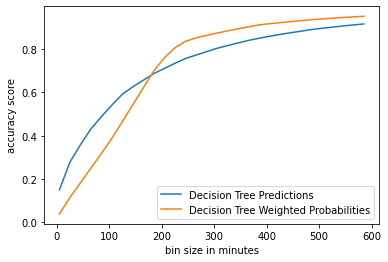

,probability_bin,pred_bin,actual_bin,prob_bin_error,pred_bin_error
count,72955.000000,72955.000000,72955.000000,72955.000000,72955.000000
mean,22.793407,13.588527,22.776396,9.144226,9.815187
std,14.970121,15.794639,20.168769,10.054000,13.782608
min,1.000000,1.000000,1.000000,0.000000,0.000000
25%,12.000000,2.000000,8.000000,3.000000,1.000000
50%,20.000000,9.000000,17.000000,7.000000,5.000000
75%,27.000000,17.000000,31.000000,10.000000,12.000000
max,94.000000,95.000000,95.000000,89.000000,94.000000


In [54]:
def get_weighted_prob_bin(prob_list):
    
    return round(sum([(count+1) * i for count,i in enumerate(prob_list)]))

prob_df = pd.DataFrame({'probability_bin':[get_weighted_prob_bin(i) for i in clf3.predict_proba(X_test_f)], 'pred_bin':clf3.predict(X_test_f), 'actual_bin':y_test_f})
prob_df = prob_df.astype('int')

prob_df['prob_bin_error'] = abs(prob_df['probability_bin'] - prob_df['actual_bin'])
prob_df['pred_bin_error'] = abs(prob_df['pred_bin'] - prob_df['actual_bin'])

pred_accs = [get_accuracy(i, list(zip(prob_df.pred_bin,prob_df.actual_bin))) for i in range(30)]
prob_accs = [get_accuracy(i, list(zip(prob_df.probability_bin,prob_df.actual_bin))) for i in range(30)]

x_ax = [error_margin +(20*x) for x in range(0,30)]

plt.plot(x_ax,pred_accs, label = 'Decision Tree Predictions')
plt.plot(x_ax,prob_accs, label = 'Decision Tree Weighted Probabilities')

plt.xlabel('bin size in minutes')
plt.ylabel('accuracy score')

plt.legend()
plt.show()
prob_df.describe()


- vergelijk prorail prognose van hersteltijd met daadwerkelijke hersteltijd

In [55]:
bins = [x for x in range(0,480,error_margin)]
labels = [x for x in range(1,len(bins))]
prog_df = df.copy()[['stm_progfh_in_duur','duration_bin']]
prog_df = column_outlier('a', prog_df.copy(), ['stm_progfh_in_duur'])
prog_df['prog_duration_bin'] = pd.cut(prog_df['stm_progfh_in_duur'], bins = bins, labels=labels)
prog_df = prog_df.dropna()
prog_df = prog_df[['duration_bin', 'prog_duration_bin']]

y3_ax = [get_accuracy(x, list(zip(list(prog_df.duration_bin), list(prog_df.prog_duration_bin)))) for x in range(0,30)]

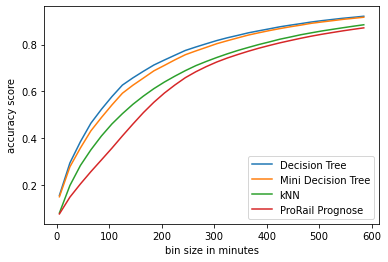

In [56]:
x_ax = [error_margin +(20*x) for x in range(0,30)]


plt.plot(x_ax,y1_ax, label = 'Decision Tree')
plt.plot(x_ax,y4_ax, label = 'Mini Decision Tree')
plt.plot(x_ax,y2_ax, label = 'kNN')
plt.plot(x_ax,y3_ax, label = 'ProRail Prognose')


plt.xlabel('bin size in minutes')
plt.ylabel('accuracy score')

plt.legend()
plt.show()


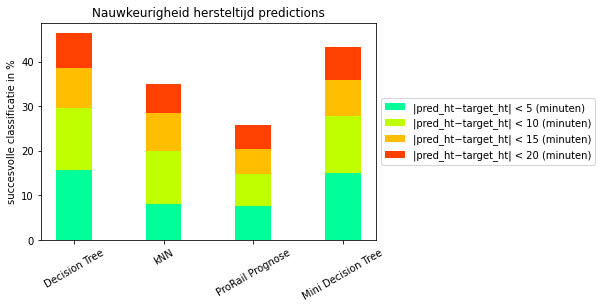

In [57]:
labels = ['Decision Tree','kNN', 'ProRail Prognose', 'Mini Decision Tree']

bar_1 = [100 * eval(f"y{i}_ax[0]") for i in range(1,len(labels)+1)]
bar_2 = [100 * (eval(f"y{i}_ax[1]") - eval(f"y{i}_ax[0]")) for i in range(1,len(labels)+1)]
bar_3 = [100 * (eval(f"y{i}_ax[2]") - eval(f"y{i}_ax[1]")) for i in range(1,len(labels)+1)]
bar_4 = [100 * (eval(f"y{i}_ax[3]") - eval(f"y{i}_ax[2]")) for i in range(1,len(labels)+1)]

width = 0.4  

fig, ax = plt.subplots()

ax.bar(labels, bar_1, width, label=f'|pred_ht−target_ht| < {error_margin} (minuten)', color = '#00ff99')
ax.bar(labels, bar_2, width ,bottom=bar_1,label=f'|pred_ht−target_ht| < {2*error_margin} (minuten)', color = '#bfff00')
ax.bar(labels, bar_3, width ,bottom=(np.array(bar_2) + np.array(bar_1)),label=f'|pred_ht−target_ht| < {3*error_margin} (minuten)', color = '#ffbf00')
ax.bar(labels, bar_4, width ,bottom=(np.array(bar_2) + np.array(bar_1) + np.array(bar_3)),label=f'|pred_ht−target_ht| < {4*error_margin} (minuten)', color = '#ff4000')


ax.set_ylabel('succesvolle classificatie in %')
ax.set_title('Nauwkeurigheid hersteltijd predictions')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=30)

plt.show()

In [58]:
list(X_train_dt.columns) #Decision Tree

['stm_reactie_duur',
 'stm_prioriteit',
 'stm_km_van_mld',
 'stm_km_tot_mld',
 'Traject_Alkmaar',
 'Traject_Alkmaar - Uitgeest',
 'Traject_Almelo',
 'Traject_Almelo - Hengelo',
 'Traject_Alphen a/d Rijn',
 'Traject_Alphen a/d Rijn - Leiden Centraal',
 'Traject_Amersfoort',
 'Traject_Amersfoort - Amersfoort Aansl.',
 'Traject_Amersfoort Aansl.',
 'Traject_Amersfoort Aansl. - Barneveld Noord',
 'Traject_Amersfoort Aansl. - Hattemerbroek',
 'Traject_Amersfoort Bokkeduinen',
 'Traject_Amersfoort Hoofdwerkplaats',
 'Traject_Amsterdam Bijlmer - Nieuwersluis-Loenen',
 'Traject_Amsterdam Bijlmer Arena',
 'Traject_Amsterdam Centraal',
 'Traject_Amsterdam Dijksgracht',
 'Traject_Amsterdam Hemhaven (gebied)',
 'Traject_Amsterdam Houtrakpolder (gebied)',
 'Traject_Amsterdam Lijnwerkplaats',
 'Traject_Amsterdam Muiderpoort',
 'Traject_Amsterdam Muiderpoort - Diemen',
 'Traject_Amsterdam Muiderpoort - Duivendrecht',
 'Traject_Amsterdam Riekerpolder',
 'Traject_Amsterdam Riekerpolder - Warmond',
 'Tr

In [59]:
list(X_train_kn.columns) #Knn 

['stm_equipm_nr_mld',
 'stm_reactie_duur',
 'stm_prioriteit',
 'stm_km_tot_mld',
 'spring',
 'summer',
 'autumn',
 'winter']

In [60]:
# basiskans voor een juiste classificatie door de meest voorkomende bin te raden
max(df.duration_bin.dropna().value_counts())/len(df.duration_bin.dropna())

0.050535479821168655

In [61]:
# decision tree
[y1_ax[0],y1_ax[1],y1_ax[2]]

[0.15624700157631416, 0.294770749091906, 0.38522376807621134]

In [62]:
# kNN
[y2_ax[0],y2_ax[1],y2_ax[2]]

[0.08105424373495801, 0.19832707810895872, 0.28367302287224194]

In [63]:
# prorail prognose
[y3_ax[0],y3_ax[1],y3_ax[2]]

[0.07694139783025496, 0.14865095526736768, 0.20486346801948246]

In [64]:
#mini decision tree
[y4_ax[0],y4_ax[1],y4_ax[2]]

[0.1502295935850867, 0.27800699061065043, 0.3583715989308478]

## Conclusie

Na dat we onze modellen hebben geëvalueerd kunnen we nu gaan concluderen dat onze mini decision tree model is de meest ideal om te gebruiken. Echter dat decision tree model hogere resultaat levert van bijna  1% besloten we toch voor minder inputs en snellere voorspelling. 
Met behulp van Reactie duur model zou we een aan een eerdere voorspelling komen op het moment dat er melding binnen. 

# Deployment 

Onze eind product zou een website zijn die verschillende modes heeft om de resultaat van de voorspellingen te toenen. 

gebruikte techniken : 
- Flask  (web framework)
- pickle (Object Serialization) 
- javascript /Css /Html 


1 **Easymode**  : 
![Easymode](Easymode.png) 

2 **Easymode Resultaat ** : 
![eaysemode2](eaysemode2.png)